In [19]:
import scipy.io as sio
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from pathlib import Path
from typing import Union, Any, Optional
import scipy.signal as signal
import seaborn as sns

# inline plots
%matplotlib inline
sns.set()

def make_beta_cheby1_filter(fs, n, rp, low, high):
    """Calculate bandpass filter coefficients (1st Order Chebyshev Filter)"""
    nyq = 0.5 * fs
    lowcut = low / nyq
    highcut = high / nyq

    b, a = signal.cheby1(n, rp, [lowcut, highcut], "band")

    return b, a

def filter_lfp(lfp_signal, beta_b, beta_a):
    
    """Filter lfp_signal

    Inputs:
        lfp_signal          - window of LFP signal (samples)

        tail_length         - tail length which will be discarded due to
                              filtering artifact (samples)

        beta_b, beta_a      - filter coefficients for filtering the beta-band
                              from the signal
    """

    lfp_beta_signal = signal.filtfilt(beta_b, beta_a, lfp_signal)

    return lfp_beta_signal 

def mat_to_dict(obj: Any) -> dict:
    '''Reads a matlab struct and turns it into a dictionary'''
    return dict(zip((e[0] for e in obj.dtype.descr), obj))

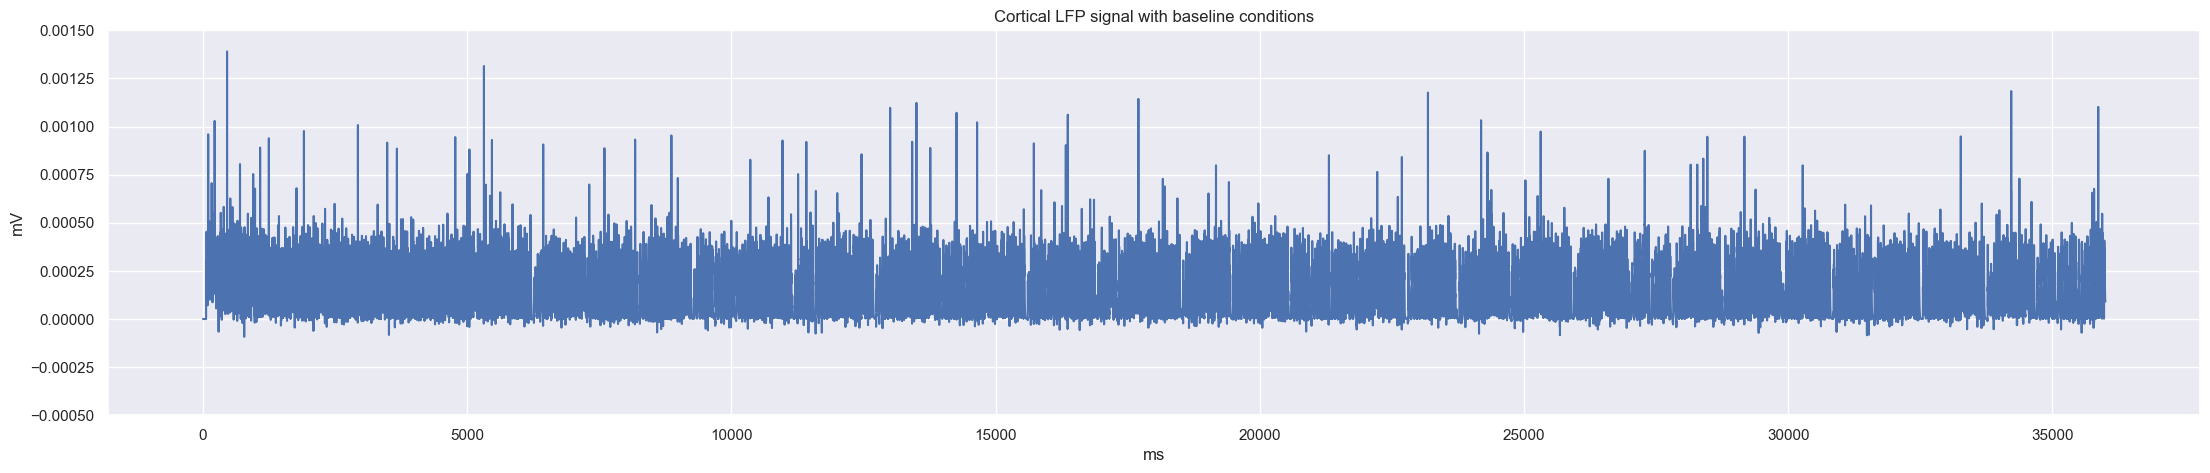

(72001, 1)


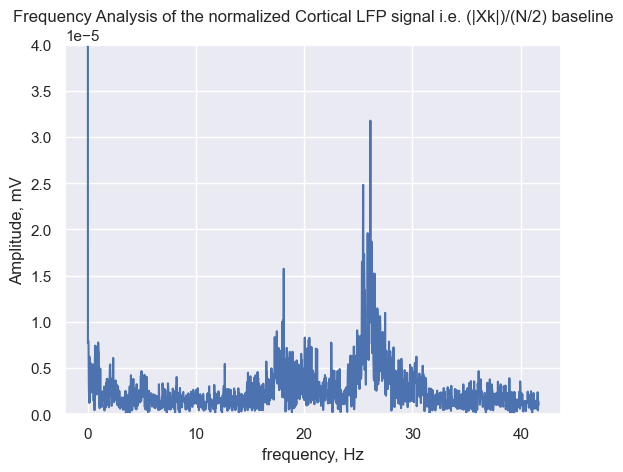

(36001,)


In [35]:
# plot baseline LFP recordings from the cortex #1
def load_stn_lfp(
        dir: Path,
        start_time: float,
        tot_time: float
        ) -> tuple[np.ndarray, dict]:
    '''Reads Cortical LFP data from a .mat file
    Modifications have been made for input parameters 
    start_time instead of stead_state_time and 
    total_time (stead_state_time + sim_time) instead of 
    sim_time'''
    lfp_file = sio.loadmat(dir / 'Cortical_LFP_0.0mA-0.0deg.mat')
    segments, _, _ = lfp_file['block'][0, 0]
    segment = mat_to_dict(segments[0, 0][0, 0])
    lfp = mat_to_dict(segment['analogsignals'][0, 0][0, 0])
    lfp_t = np.linspace(start_time , tot_time, len(lfp['signal']))
    return lfp_t, lfp

dir = Path('./RESULTS_cortical_rec_baseline_cor')
lfp_t, lfp = load_stn_lfp(dir, 0, 36000)

plt.figure(figsize=(27, 5))
plt.plot(lfp_t, lfp["signal"][:,0])
plt.xlabel('ms')
plt.ylabel('mV')
plt.ylim([-0.0005, 0.0015])
plt.title('Cortical LFP signal with baseline conditions')
plt.show()

dir2 = Path('./RESULTS_cortical_rec_baseline_cor')
lfp_t, lfp = load_stn_lfp(dir2, 0, 4000)
print(lfp["signal"].shape)

fft_spectrum = np.fft.rfft(lfp["signal"][:,0])
freq = np.fft.rfftfreq(lfp["signal"][:,0].size, d=1./2000)
fft_spectrum_abs = np.abs(fft_spectrum)

# Calculate N/2 to normalize the FFT output
N = lfp["signal"][:,0].size
normalize = N/2

# normalized FFT (|Xk|)/(N/2)
norm_fft_spectrum = np.abs(fft_spectrum)/normalize

plt.plot(freq[:1500], norm_fft_spectrum[:1500])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, mV")
plt.ylim([0, 0.00004])
plt.title("Frequency Analysis of the normalized Cortical LFP signal i.e. (|Xk|)/(N/2) baseline")
plt.show()

print(freq.shape)

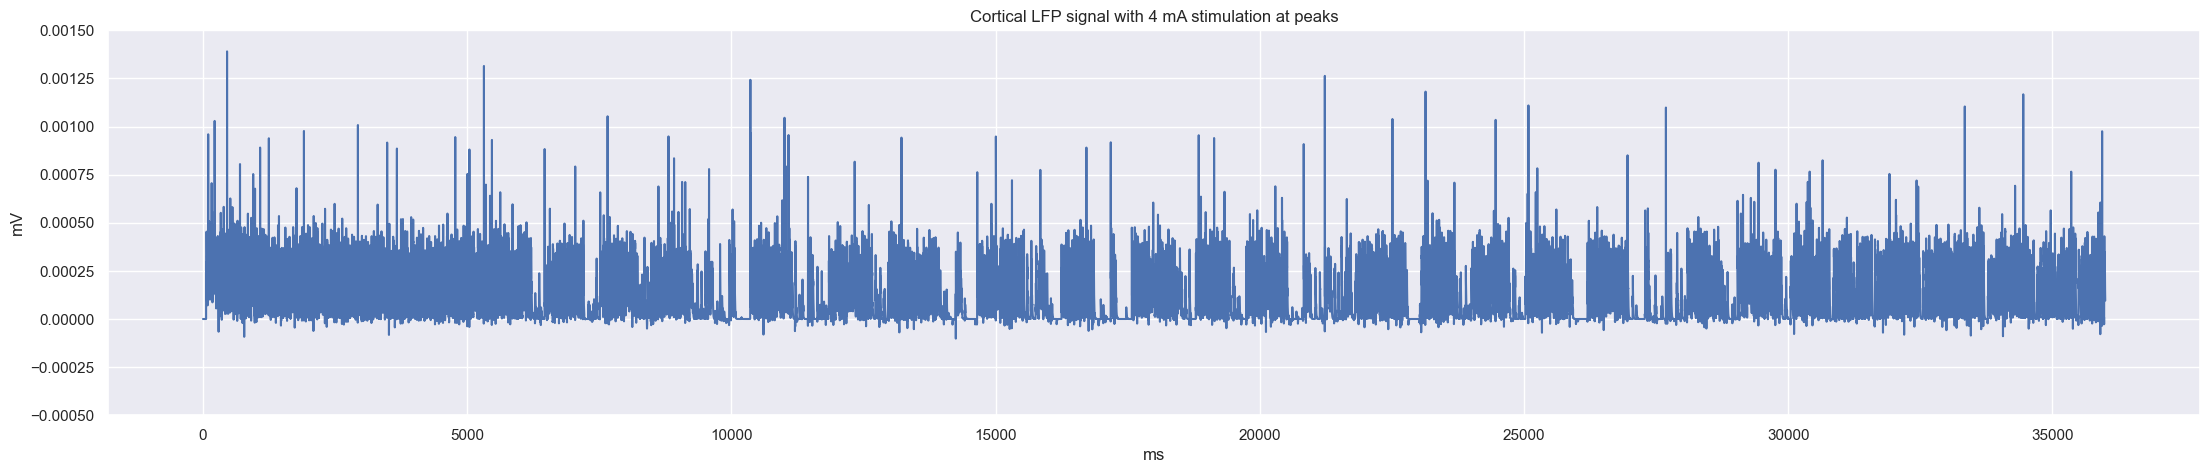

(72001, 1)


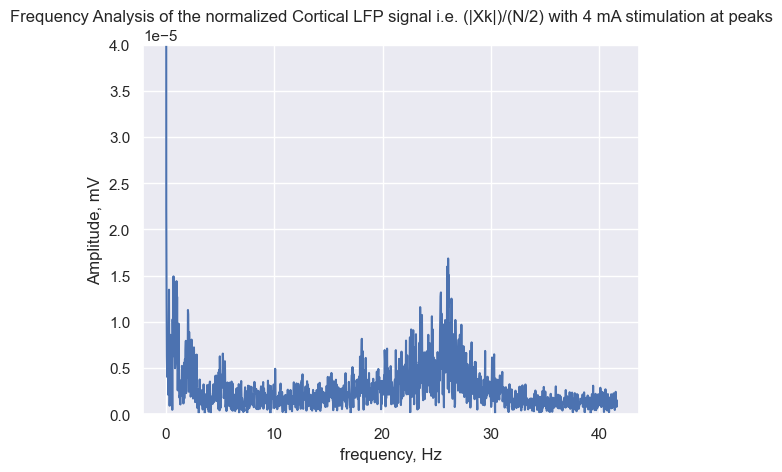

(36001,)


In [38]:
# plot LFP recordings from the cortex
def load_stn_lfp(
        dir: Path,
        start_time: float,
        tot_time: float
        ) -> tuple[np.ndarray, dict]:
    '''Reads Cortical LFP data from a .mat file
    Modifications have been made for input parameters 
    start_time instead of stead_state_time and 
    total_time (stead_state_time + sim_time) instead of 
    sim_time'''
    lfp_file = sio.loadmat(dir / 'Cortical_LFP_4.0mA-0.0deg.mat')
    segments, _, _ = lfp_file['block'][0, 0]
    segment = mat_to_dict(segments[0, 0][0, 0])
    lfp = mat_to_dict(segment['analogsignals'][0, 0][0, 0])
    lfp_t = np.linspace(start_time , tot_time, len(lfp['signal']))
    return lfp_t, lfp

dir = Path('./Results_cortical_rec_4mA_peak')
lfp_t, lfp = load_stn_lfp(dir, 0, 36000)

plt.figure(figsize=(27, 5))
plt.plot(lfp_t, lfp["signal"][:,0])
plt.xlabel('ms')
plt.ylabel('mV')
plt.ylim([-0.0005, 0.0015])
plt.title('Cortical LFP signal with 4 mA stimulation at peaks')
plt.show()

dir2 = Path('./RESULTS_cortical_rec_4mA_peak')
lfp_t, lfp = load_stn_lfp(dir2, 0, 4000)
print(lfp["signal"].shape)

fft_spectrum = np.fft.rfft(lfp["signal"][:,0])
freq = np.fft.rfftfreq(lfp["signal"][:,0].size, d=1./2000)
fft_spectrum_abs = np.abs(fft_spectrum)

# Calculate N/2 to normalize the FFT output
N = lfp["signal"][:,0].size
normalize = N/2

# normalized FFT (|Xk|)/(N/2)
norm_fft_spectrum = np.abs(fft_spectrum)/normalize

plt.plot(freq[:1500], norm_fft_spectrum[:1500])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, mV")
plt.ylim([0, 0.00004])
plt.title("Frequency Analysis of the normalized Cortical LFP signal i.e. (|Xk|)/(N/2) with 4 mA stimulation at peaks")
plt.show()

print(freq.shape)

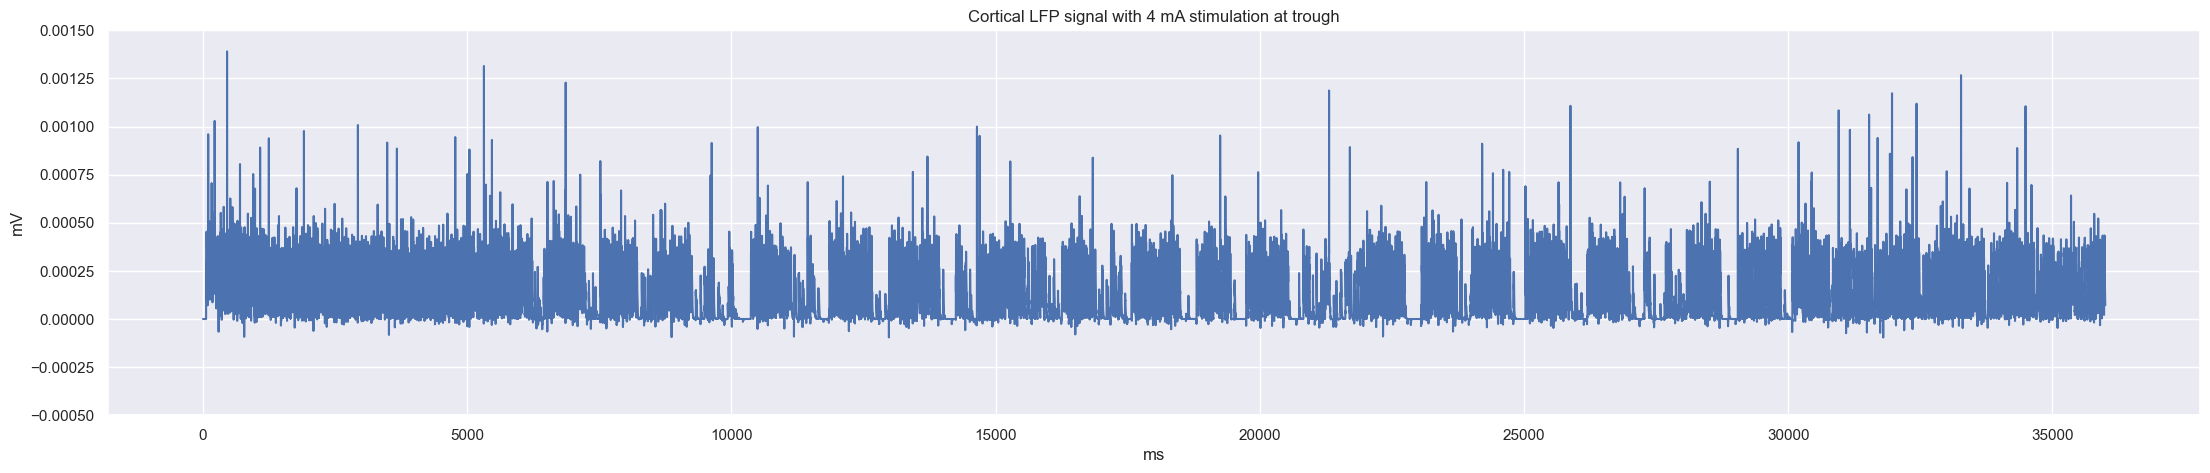

(72001, 1)


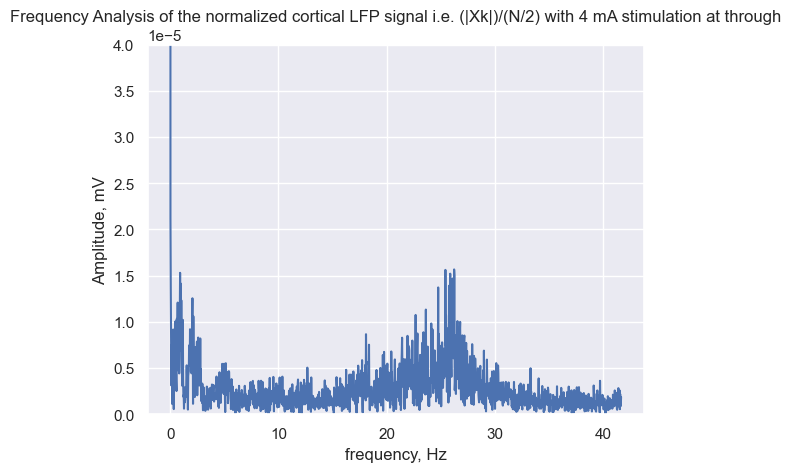

(36001,)


In [40]:
# plot LFP recordings from the cortex
def load_stn_lfp(
        dir: Path,
        start_time: float,
        tot_time: float
        ) -> tuple[np.ndarray, dict]:
    '''Reads Cortical LFP data from a .mat file
    Modifications have been made for input parameters 
    start_time instead of stead_state_time and 
    total_time (stead_state_time + sim_time) instead of 
    sim_time'''
    lfp_file = sio.loadmat(dir / 'Cortical_LFP_4.0mA-180.0deg.mat')
    segments, _, _ = lfp_file['block'][0, 0]
    segment = mat_to_dict(segments[0, 0][0, 0])
    lfp = mat_to_dict(segment['analogsignals'][0, 0][0, 0])
    lfp_t = np.linspace(start_time , tot_time, len(lfp['signal']))
    return lfp_t, lfp

dir = Path('./Results_cortical_rec_4mA_trough')
lfp_t, lfp = load_stn_lfp(dir, 0, 36000)

plt.figure(figsize=(27, 5))
plt.plot(lfp_t, lfp["signal"][:,0])
plt.xlabel('ms')
plt.ylabel('mV')
plt.ylim([-0.0005, 0.0015])
plt.title('Cortical LFP signal with 4 mA stimulation at trough')
plt.show()

dir2 = Path('./Results_cortical_rec_4mA_trough')
lfp_t, lfp = load_stn_lfp(dir2, 0, 4000)
print(lfp["signal"].shape)

fft_spectrum = np.fft.rfft(lfp["signal"][:,0])
freq = np.fft.rfftfreq(lfp["signal"][:,0].size, d=1./2000)
fft_spectrum_abs = np.abs(fft_spectrum)

# Calculate N/2 to normalize the FFT output
N = lfp["signal"][:,0].size
normalize = N/2

# normalized FFT (|Xk|)/(N/2)
norm_fft_spectrum = np.abs(fft_spectrum)/normalize

plt.plot(freq[:1500], norm_fft_spectrum[:1500])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, mV")
plt.ylim([0, 0.00004])
plt.title("Frequency Analysis of the normalized cortical LFP signal i.e. (|Xk|)/(N/2) with 4 mA stimulation at through")
plt.show()

print(freq.shape)